In [57]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import csv


In [58]:
path = Path('./sampledataset.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

m = 0
x_data, y_data = np.array([]),np.array([])
for row in reader:
    m += 1
    x_data = np.append(x_data, float(row[0]))
    y_data = np.append(y_data, float(row[1]))
    

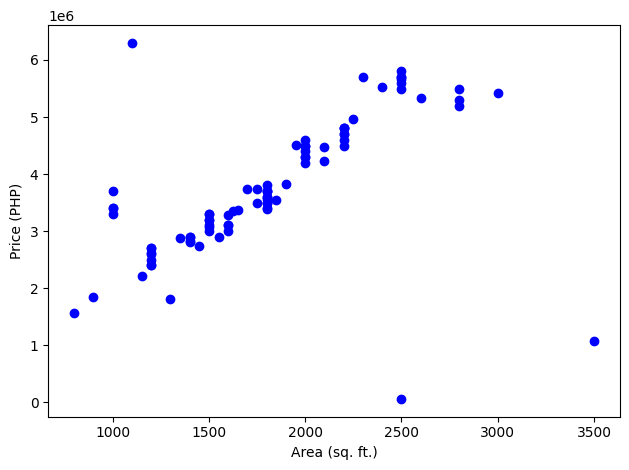

In [59]:
fig, ax = plt.subplots()

ax.scatter(x_data, y_data, c='blue')
ax.set_xlabel("Area (sq. ft.)")
ax.set_ylabel("Price (PHP)")

# Adjust layout to prevent truncation
fig.tight_layout()

plt.show()

In [60]:
# Training
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
x_fit = np.array(x_data).reshape(-1, 1)
y_fit = np.array(y_data).reshape(-1, 1)
reg.fit(x_fit, y_fit)

LinearRegression()